In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [42]:
train_data=pd.read_csv('train.csv')
validation_data=pd.read_csv('test.csv')
target='SalePrice'

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
validation_data[target]=np.nan

In [44]:
df=pd.concat([train_data,validation_data])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [46]:
def numerical_features(data):
     return data.select_dtypes(include='number').columns.tolist()
def categorical_features(data):
     return data.select_dtypes(exclude='number').columns.tolist()
def remove_features(data,col):
    return data.drop(col,axis=1)
def splitX_y(data,target_features):
     X=data.drop(target_features,axis=1)
     y=data[target_features]
     return X,y
def train_test_split(X,y):
     return train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
def barplot(data,col):
    sns.barplot(data,x=col,y='column_name')
    

In [48]:
num_features=numerical_features(df)
cat_features=categorical_features(df)

In [49]:
def describe_data(data):
    num_features=numerical_features(data)
   
    return pd.DataFrame({
        'column_name': data.columns ,
        'd_type': data.dtypes,
        'count': data.count(),
        'min': [round(data[col].min(), 2) if col in num_features else '' for col in data.columns],
        '25%': [round(data[col].quantile(0.25), 2) if col in num_features else '' for col in data.columns],
        '50%': [round(data[col].quantile(0.5), 2) if col in num_features else '' for col in data.columns],
        '75%': [round(data[col].quantile(0.75), 2) if col in num_features else '' for col in data.columns],
        'mean': [round(data[col].mean(), 2) if col in num_features else '' for col in data.columns],
        'mode': ['' if data[col].mode().empty else data[col].mode().iloc[0] for col in data.columns],
        'mode #': [data[col].value_counts().max() if not data[col].mode().empty else '' for col in data.columns],
        'null #': [data[col].isnull().sum() for col in data.columns],
        'null %': [round(data[col].isnull().mean() * 100, 2) for col in data.columns]
    })
    

In [50]:
describe_num=describe_data(df[num_features])
describe_cat=describe_data(df[cat_features])

In [51]:
describe_cat

,column_name,d_type,count,min,25%,50%,75%,mean,mode,mode #,null #,null %
MSZoning,MSZoning,object,2915,,,,,,RL,2265,4,0.14
Street,Street,object,2919,,,,,,Pave,2907,0,0.00
Alley,Alley,object,198,,,,,,Grvl,120,2721,93.22
LotShape,LotShape,object,2919,,,,,,Reg,1859,0,0.00
LandContour,LandContour,object,2919,,,,,,Lvl,2622,0,0.00
Utilities,Utilities,object,2917,,,,,,AllPub,2916,2,0.07
LotConfig,LotConfig,object,2919,,,,,,Inside,2133,0,0.00
LandSlope,LandSlope,object,2919,,,,,,Gtl,2778,0,0.00
Neighborhood,Neighborhood,object,2919,,,,,,NAmes,443,0,0.00
Condition1,Condition1,object,2919,,,,,,Norm,2511,0,0.00


In [52]:
describe_num

,column_name,d_type,count,min,25%,50%,75%,mean,mode,mode #,null #,null %
Id,Id,int64,2919,1.0,730.5,1460.0,2189.5,1460.00,1.0,1,0,0.00
MSSubClass,MSSubClass,int64,2919,20.0,20.0,50.0,70.0,57.14,20.0,1079,0,0.00
LotFrontage,LotFrontage,float64,2433,21.0,59.0,68.0,80.0,69.31,60.0,276,486,16.65
LotArea,LotArea,int64,2919,1300.0,7478.0,9453.0,11570.0,10168.11,9600.0,44,0,0.00
OverallQual,OverallQual,int64,2919,1.0,5.0,6.0,7.0,6.09,5.0,825,0,0.00
OverallCond,OverallCond,int64,2919,1.0,5.0,5.0,6.0,5.56,5.0,1645,0,0.00
YearBuilt,YearBuilt,int64,2919,1872.0,1953.5,1973.0,2001.0,1971.31,2005.0,142,0,0.00
YearRemodAdd,YearRemodAdd,int64,2919,1950.0,1965.0,1993.0,2004.0,1984.26,1950.0,361,0,0.00
MasVnrArea,MasVnrArea,float64,2896,0.0,0.0,0.0,164.0,102.20,0.0,1738,23,0.79
BsmtFinSF1,BsmtFinSF1,float64,2918,0.0,0.0,368.5,733.0,441.42,0.0,929,1,0.03


In [62]:
def checknull_perc(data,threshold=50):
    if not (data['null %']>threshold).any() :
        print(f'no columns with more then { threshold }% of null values')
    else:
        barplot(data[data['null %']>threshold],'null %')
    
        

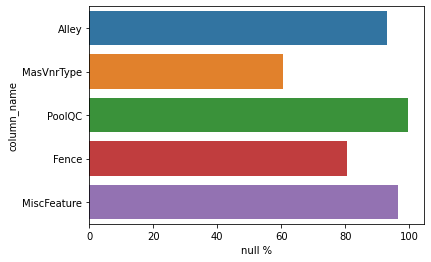

In [63]:
checknull_perc(describe_cat)

In [64]:
checknull_perc(describe_num)

no columns with more then 50% of null values


In [68]:
df=remove_features(df,describe_cat[describe_cat['null %']>50]['column_name'])

In [69]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [71]:
cat_features=categorical_features(df)
describe_num= describe_data(df[num_features])
describe_cat= describe_data(df[cat_features])

In [78]:
checknull_perc(describe_num)
print('-'*45)
checknull_perc(describe_cat)

no columns with more then 50% of null values
---------------------------------------------
no columns with more then 50% of null values
